## Problem 2

A pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
sns.set()

### Data Dictionary

In [4]:
heart = pd.read_csv('heart disease.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart1 = heart.copy(deep=True)

### Exploratory Data Analysis

In [7]:
heart1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [8]:
heart1.shape

(303, 14)

In [9]:
heart1.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [10]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heart1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Imputation not needed

In [12]:
heart1.duplicated().sum()

1

In [13]:
heart1.drop_duplicates(keep='first', inplace=True)

In [14]:
heart1.shape

(302, 14)

#### Univariate analysis

##### Moments

In [15]:
heart1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


we can see that the mean has varied range. We would want to Normalize the data.

In [16]:
#Fisher's Kurtosis
heart1.kurt(axis=0)

age        -0.527512
sex        -1.391273
cp         -1.183729
trestbps    0.922996
chol        4.542591
fbs         1.937947
restecg    -1.359464
thalach    -0.062186
exang      -1.466170
oldpeak     1.567876
slope      -0.629935
ca          0.781003
thal        0.295855
target     -1.983008
dtype: float64

In [17]:
#skew
heart1.skew(axis=0)

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

##### Distributions

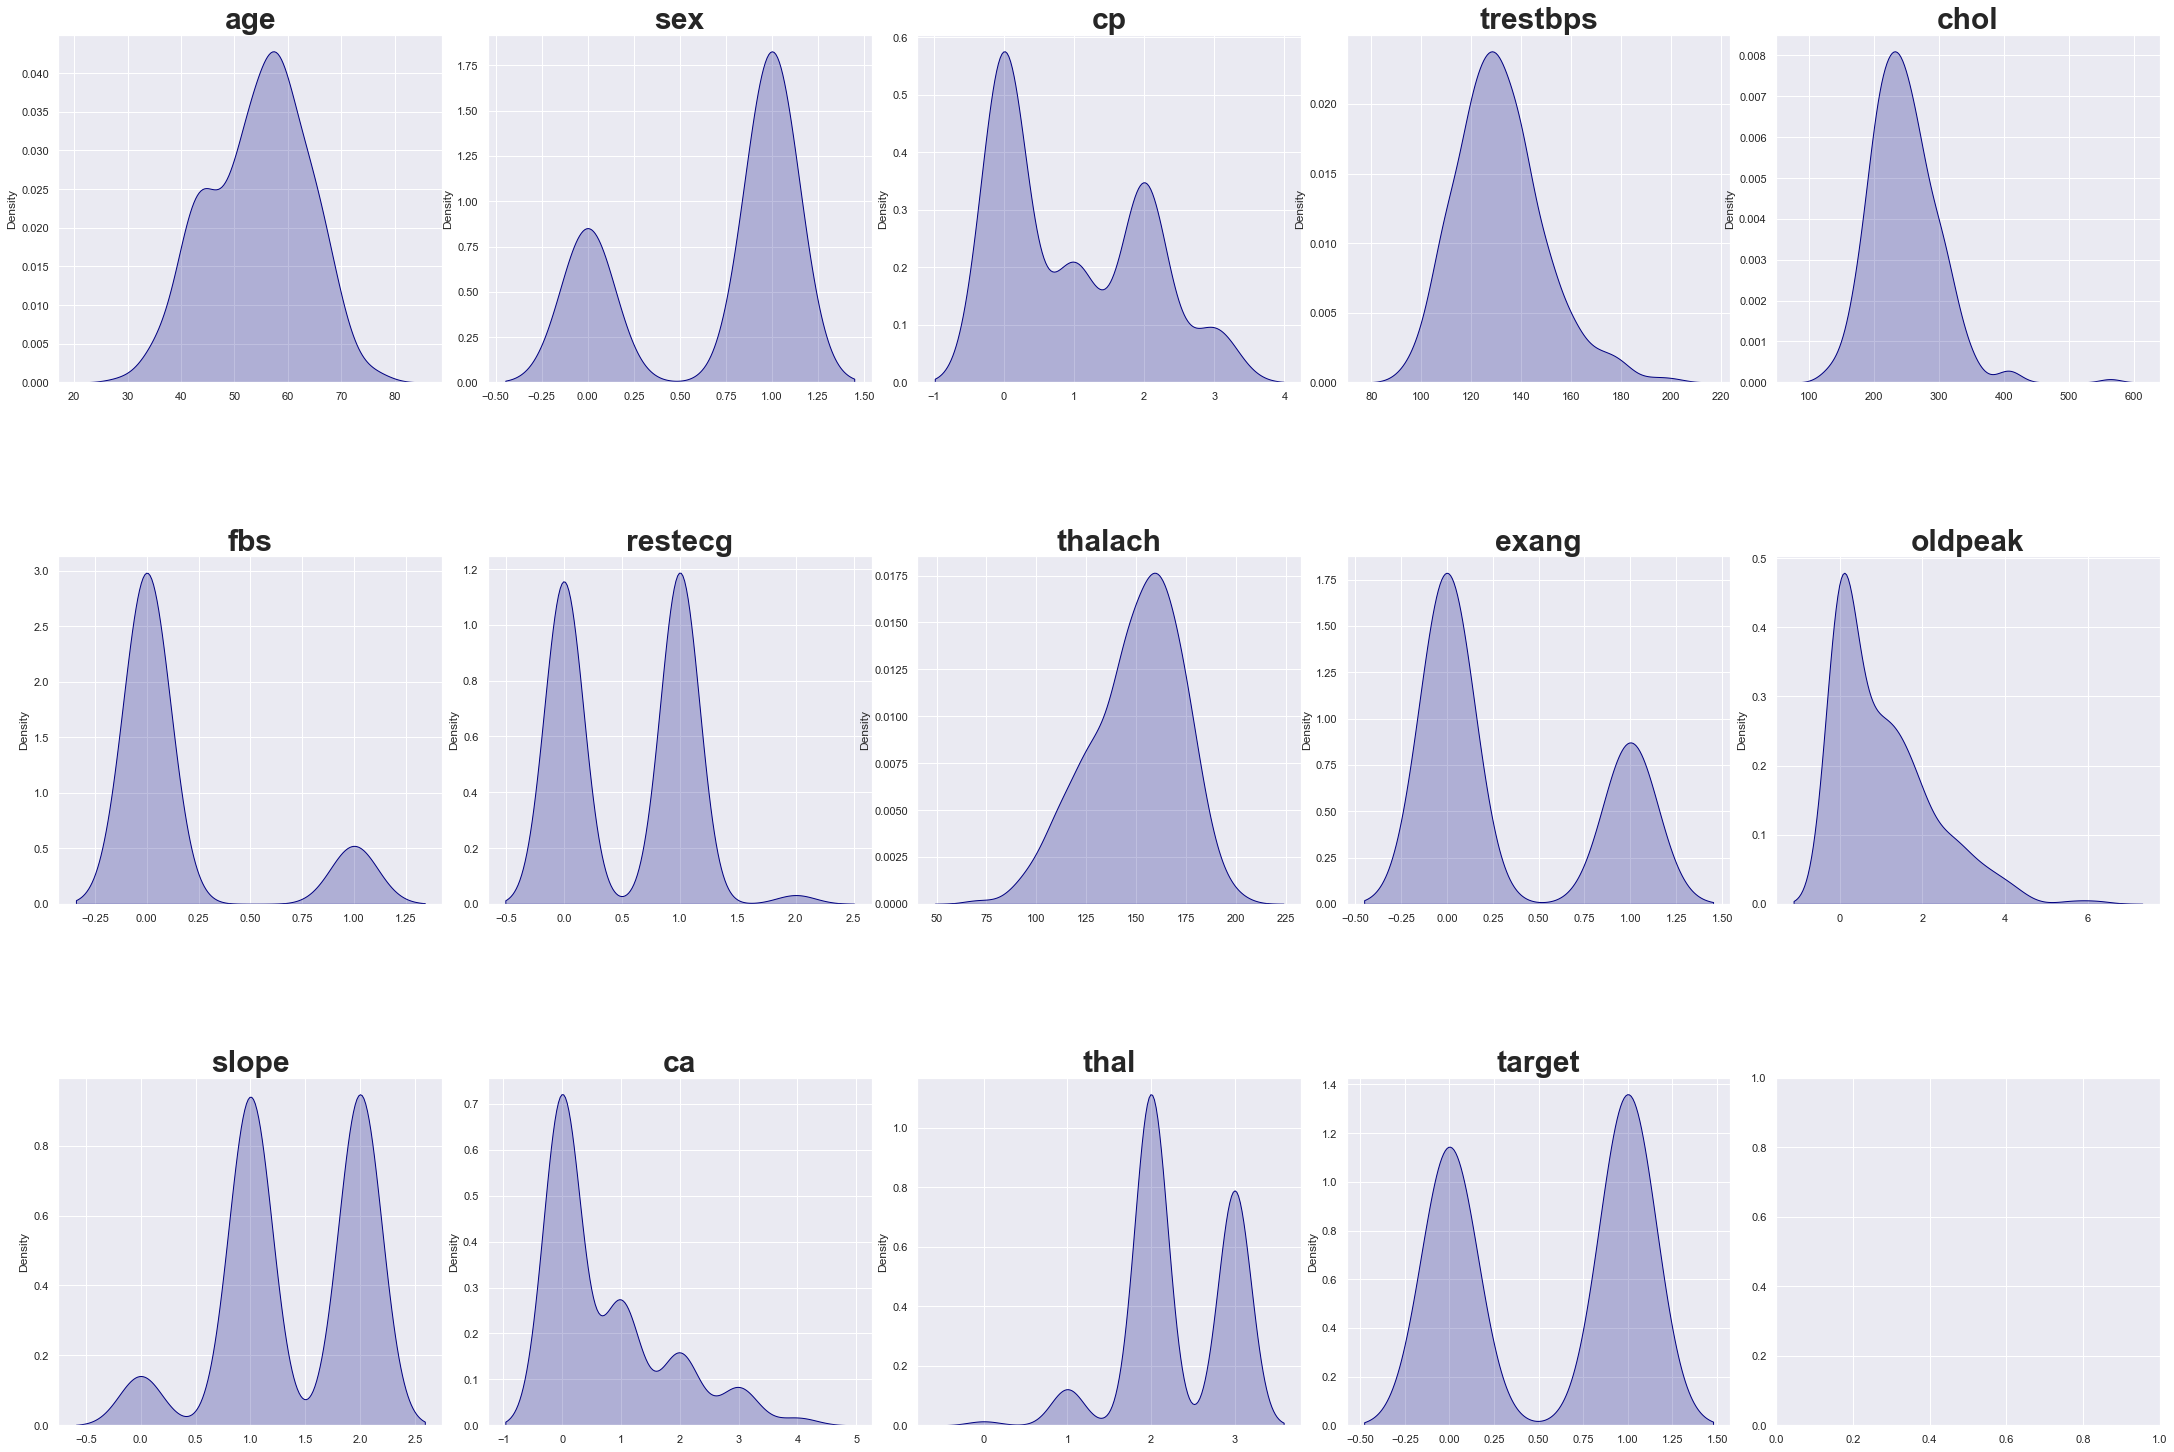

In [18]:
#display distributions for numeric data
fig, axes = plt.subplots(3, 5, sharex=False, figsize=(30,20))
fig.tight_layout()
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4],
           axes[2,0],axes[2,1],axes[2,2],axes[2,3],axes[2,4]]
j=0
for col in heart1.columns:
    p= sns.kdeplot(data=heart1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * ca, oldpeak are right skewed  
    * target , exang , sex and fbs are bimodal 


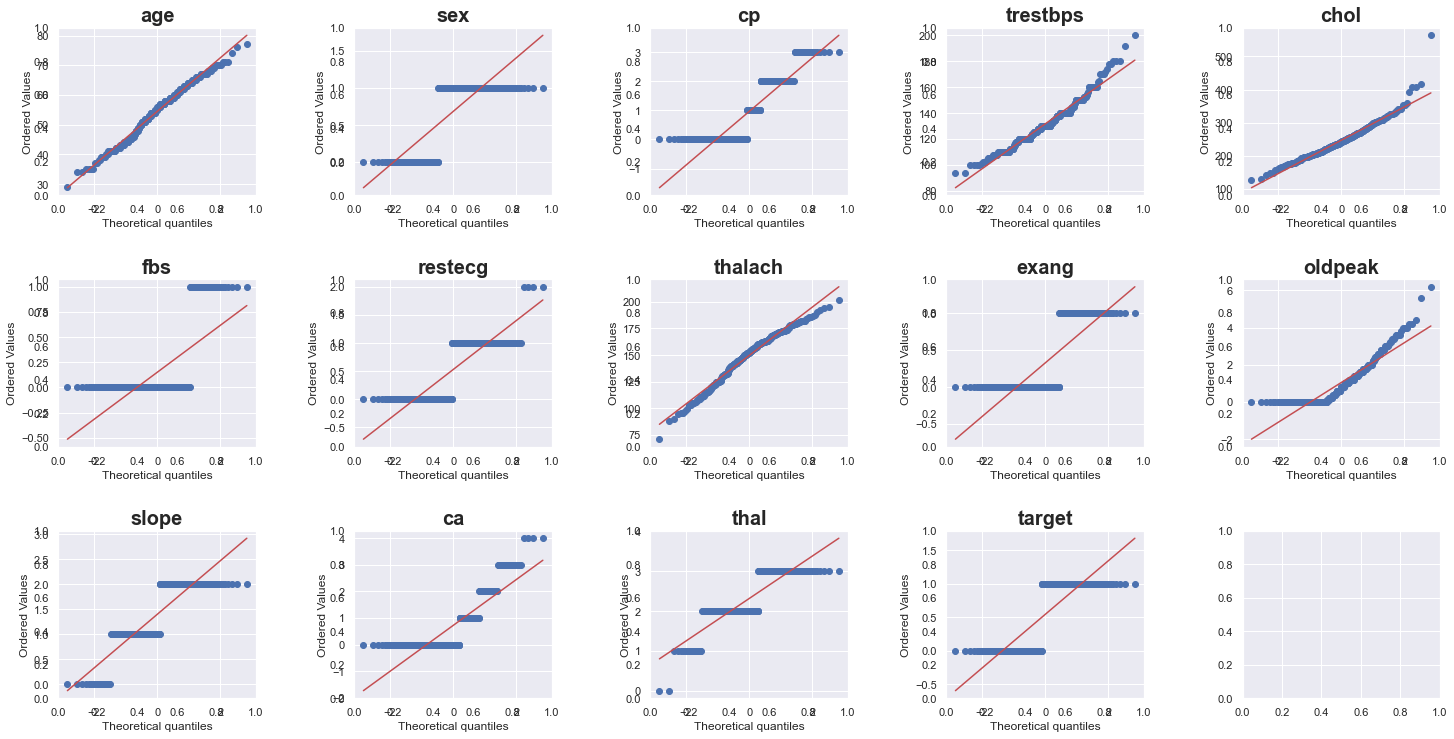

In [19]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
fig, axes = plt.subplots(3, 5, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
j=0

for col in heart1.columns:
    ax = fig.add_subplot(3, 5, nfig[j])
    p=stats.probplot(heart1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * all are non gaussian

In [20]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [21]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(heart1)

,column,stat,p,Distribution
0,age,0.986636,6.742844e-03,Not Gaussian
1,sex,0.586334,3.124307e-26,Not Gaussian
2,cp,0.789700,1.911370e-19,Not Gaussian
3,trestbps,0.965727,1.419376e-06,Not Gaussian
4,chol,0.946582,5.196310e-09,Not Gaussian
5,fbs,0.424705,6.199101e-30,Not Gaussian
6,restecg,0.679373,1.506495e-23,Not Gaussian
7,thalach,0.976791,8.269131e-05,Not Gaussian
8,exang,0.591848,4.364358e-26,Not Gaussian
9,oldpeak,0.845220,9.989036e-17,Not Gaussian


##### Outlier Treatment

In [23]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
heart1_norm= pd.DataFrame(scalerMM.fit_transform(heart1))
heart1_norm.columns=heart1.columns


In [24]:
heart1_norm.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
135,0.416667,0.0,0.000000,0.339623,0.326484,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667,1.0
265,0.541667,0.0,0.000000,0.811321,0.458904,0.0,1.0,0.351145,1.0,0.548387,0.5,0.00,0.666667,0.0
139,0.729167,1.0,0.000000,0.320755,0.312785,0.0,0.5,0.259542,1.0,0.032258,0.5,0.25,1.000000,1.0
88,0.520833,0.0,0.666667,0.150943,0.200913,0.0,0.5,0.664122,0.0,0.258065,0.5,0.00,0.666667,1.0


<AxesSubplot:>

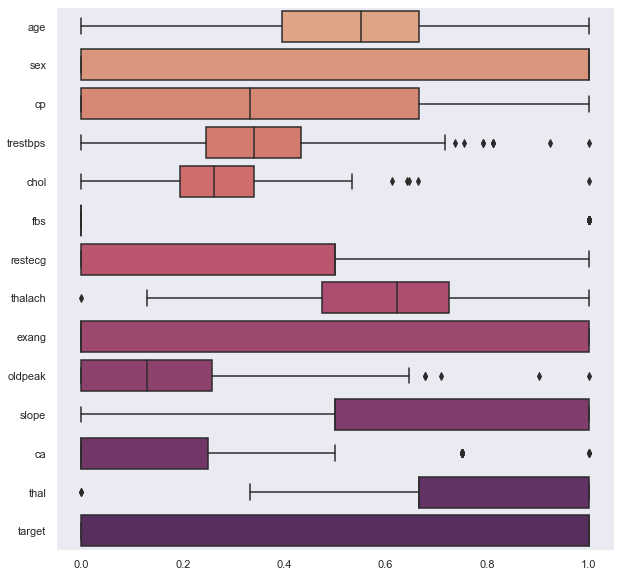

In [25]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=heart1_norm, orient="h", palette = 'flare')

In [26]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [27]:
#get outliers from all numeric features
IQR_Outliers(heart1, heart1.columns)

Number of samples:  302

Number of rows with outliers:  74


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,age,0,0.00,80.500,28.500
1,sex,0,0.00,2.500,-1.500
2,cp,0,0.00,5.000,-3.000
3,trestbps,9,2.98,170.000,90.000
4,chol,5,1.66,370.375,115.375
5,fbs,45,14.90,0.000,0.000
6,restecg,0,0.00,2.500,-1.500
7,thalach,1,0.33,215.125,84.125
8,exang,0,0.00,2.500,-1.500
9,oldpeak,5,1.66,4.000,-2.400


6 columns containing outliers. fbs is more than 10% of data hence we can ignore.

### Multivariate Analysis

#### Pair-wise Scatter Plots

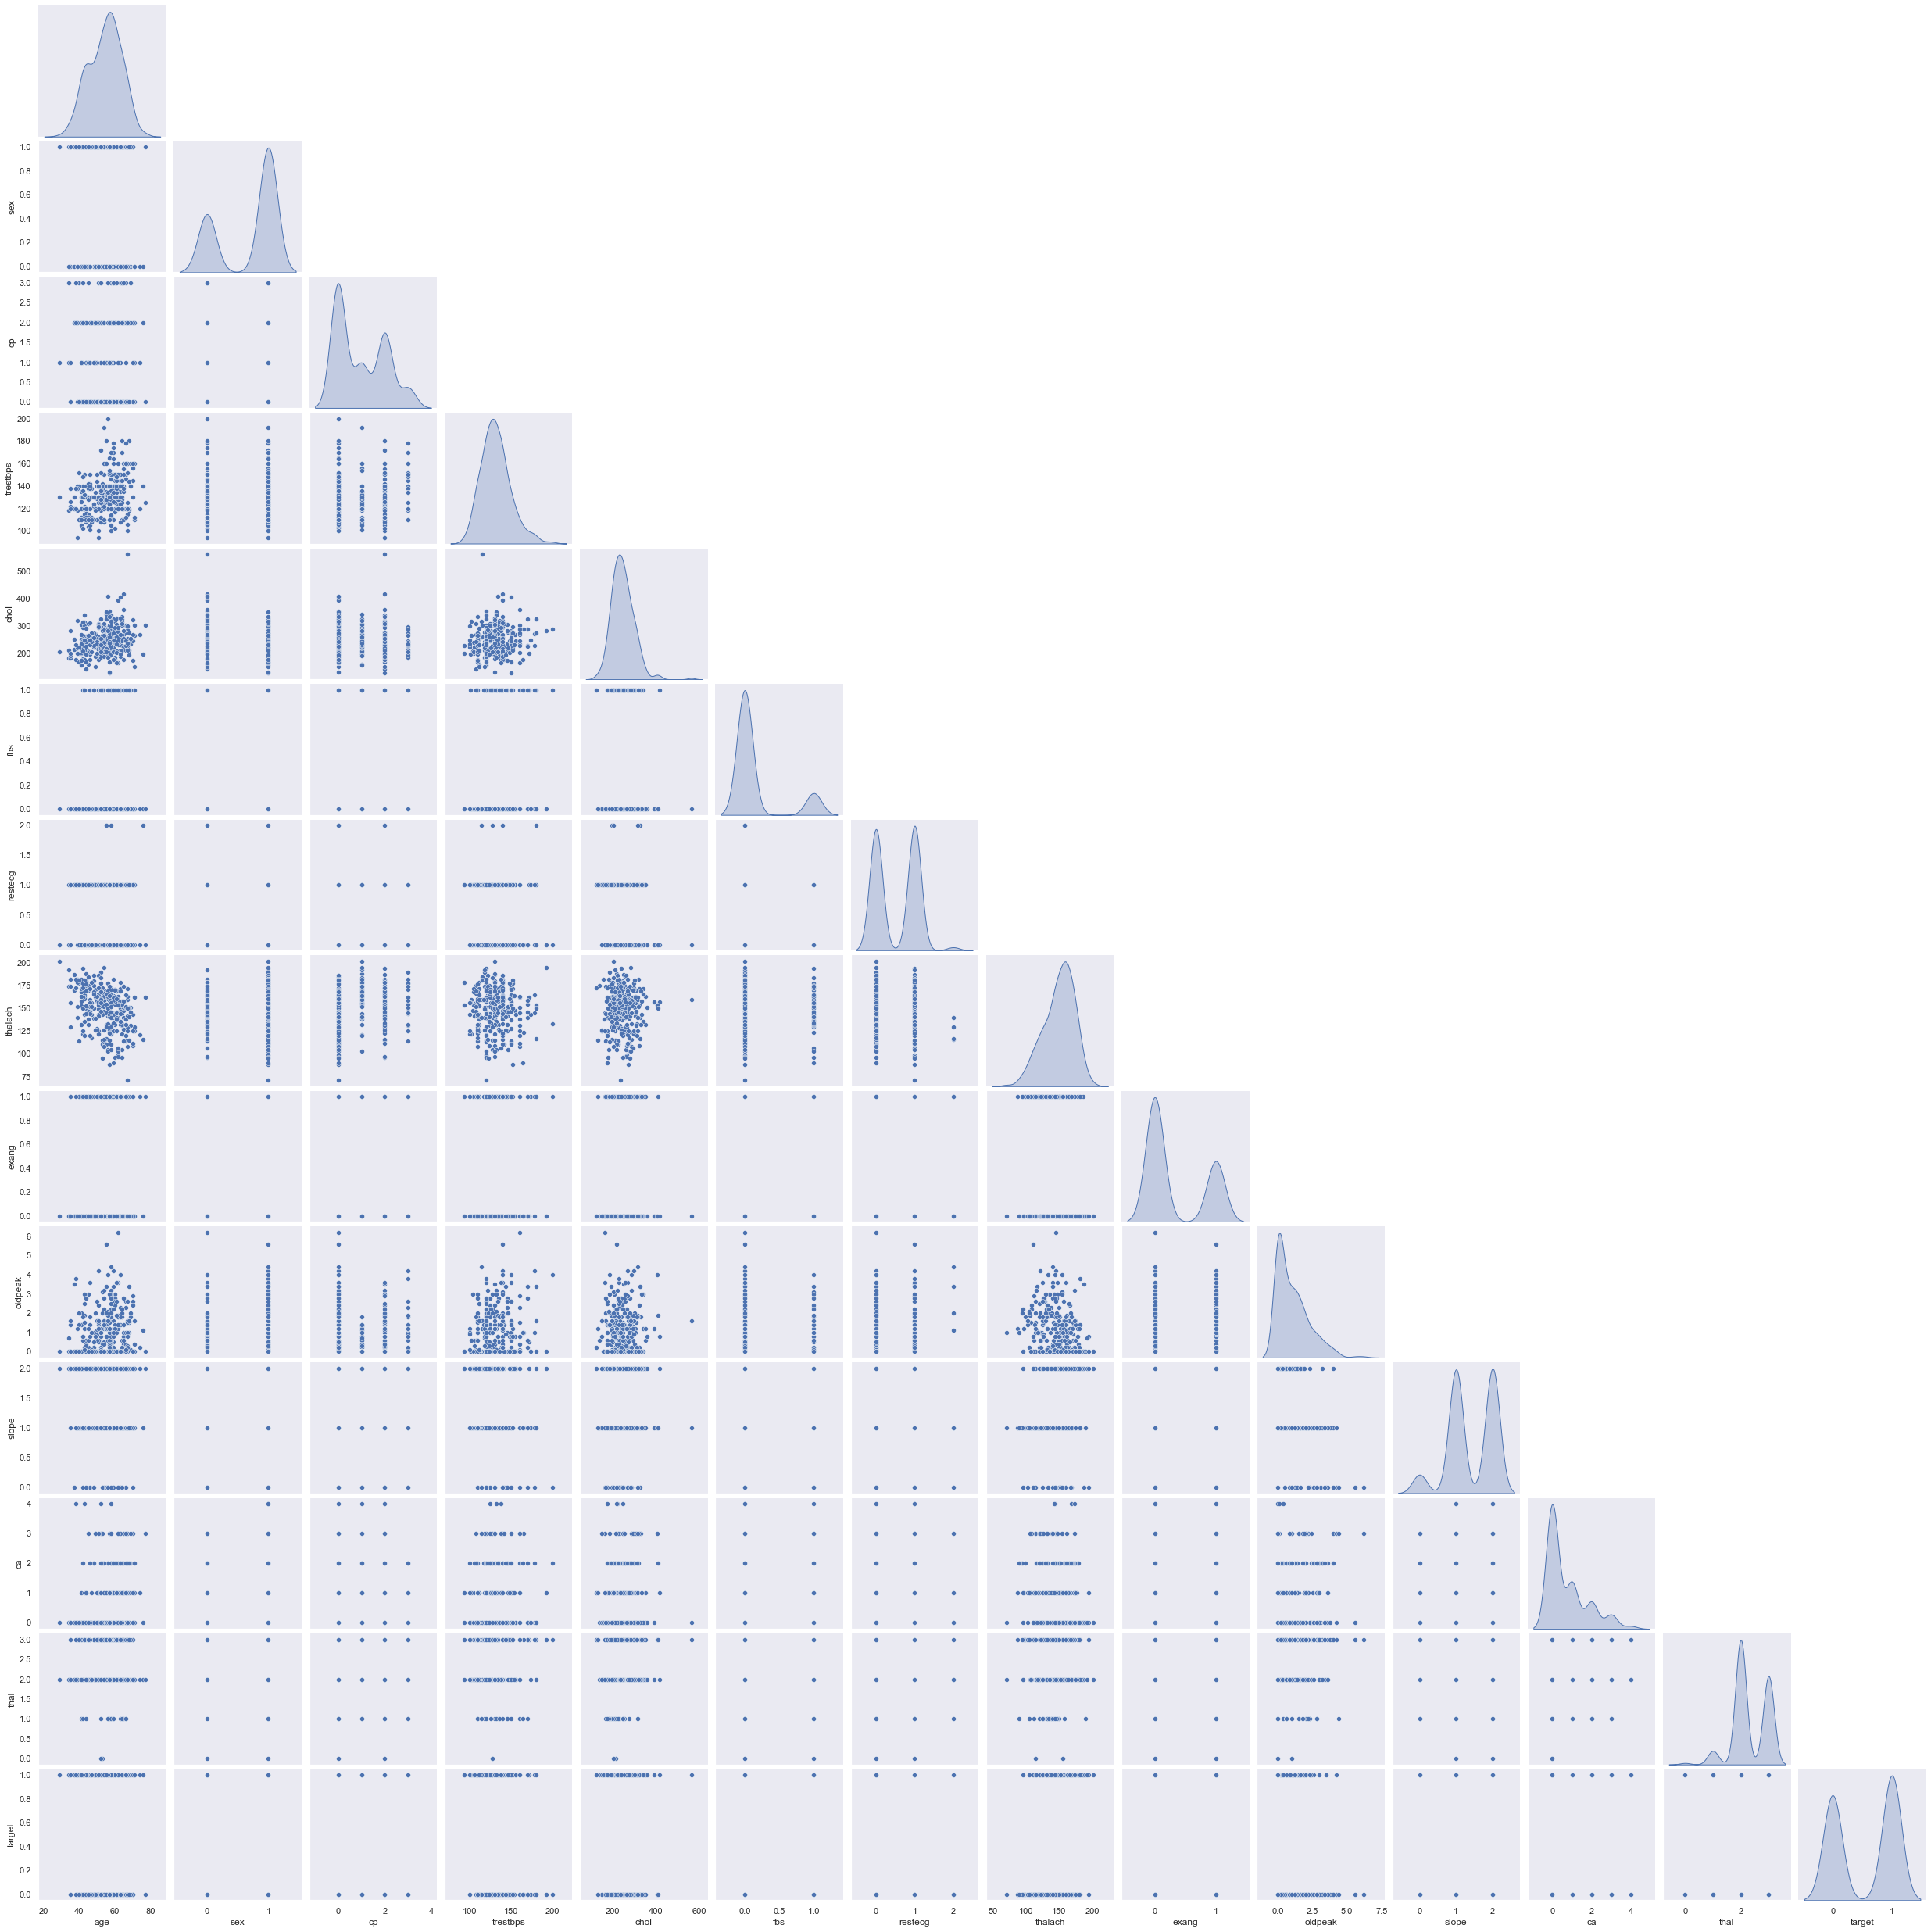

In [28]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(heart1,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

#### Triangular Heat Map

<AxesSubplot:>

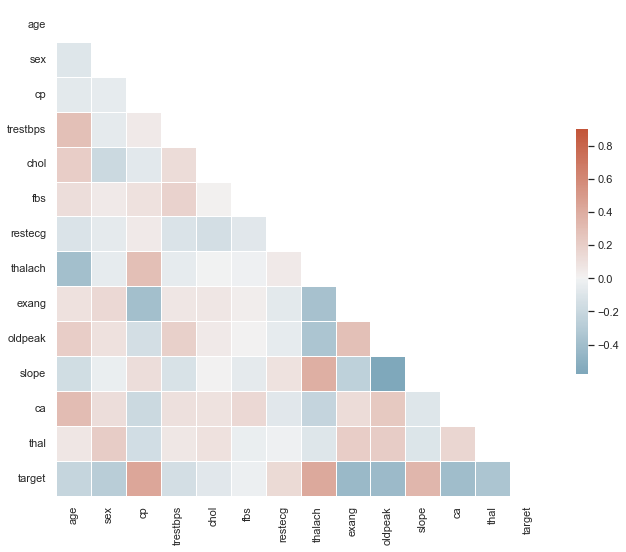

In [29]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(heart1.corr(), dtype=bool))

corr= heart1.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [30]:
heart1.corr(method ='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [31]:
#Get only highly correlated items

df = heart1.corr().abs().round(1)
df = heart1.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
sex,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
cp,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
trestbps,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
chol,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah
fbs,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah
restecg,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah
thalach,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah
exang,blah,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah
oldpeak,blah,blah,blah,blah,blah,blah,blah,blah,blah,1.0,-0.6,blah,blah,blah


**Observations**  
* We can see that none are highly correlated


### Data Preprocessing

In [35]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierCapper(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_cap(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_cap)

In [36]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline


features_with_outliers = ['trestbps','chol','thalach','oldpeak','ca','thal']

gauss_outlier_transformer = make_column_transformer(
    (PowerTransformer(method='yeo-johnson', standardize=False), heart1.columns),
    (OutlierCapper(), features_with_outliers),
)


preprocessor = ColumnTransformer(
    transformers=[
        ("gauss_outlier", gauss_outlier_transformer, heart1.columns),
    ]
)
scaler = ColumnTransformer(
    transformers=[
        ("scaling", MinMaxScaler(), slice(0,14)),
    ]
)

### Create Preprocessing Pipeline

In [37]:
# We will later Append classifier to preprocessing pipeline.
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("scaling", scaler)]
)

In [38]:
# Apply the tranformation
heart1_transformed = pipe.fit_transform(heart1) 

In [39]:
heart1.shape

(302, 14)

In [40]:
heart1_transformed.shape

(302, 14)

In [41]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, heart1.shape, heart1_transformed.shape))

(0, 0)

In [42]:
# View sample records after transformation
heart1_transformed[0,:]

array([0.66957615, 1.        , 1.        , 0.63818218, 0.42900736,
       1.        , 0.        , 0.46315651, 0.        , 0.71554071,
       0.        , 0.        , 0.22747368, 1.        ])

In [43]:
# View Tranformation steps
pipe.named_steps

{'preprocessor': ColumnTransformer(transformers=[('gauss_outlier',
                                  ColumnTransformer(transformers=[('powertransformer',
                                                                   PowerTransformer(standardize=False),
                                                                   Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object')),
                                                                  ('outliercapper',
                                                                   OutlierCapper(),
                                                                   ['trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                              

### Model Building

#### Agglomerative Clustering

##### View Dendrogram

In [44]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

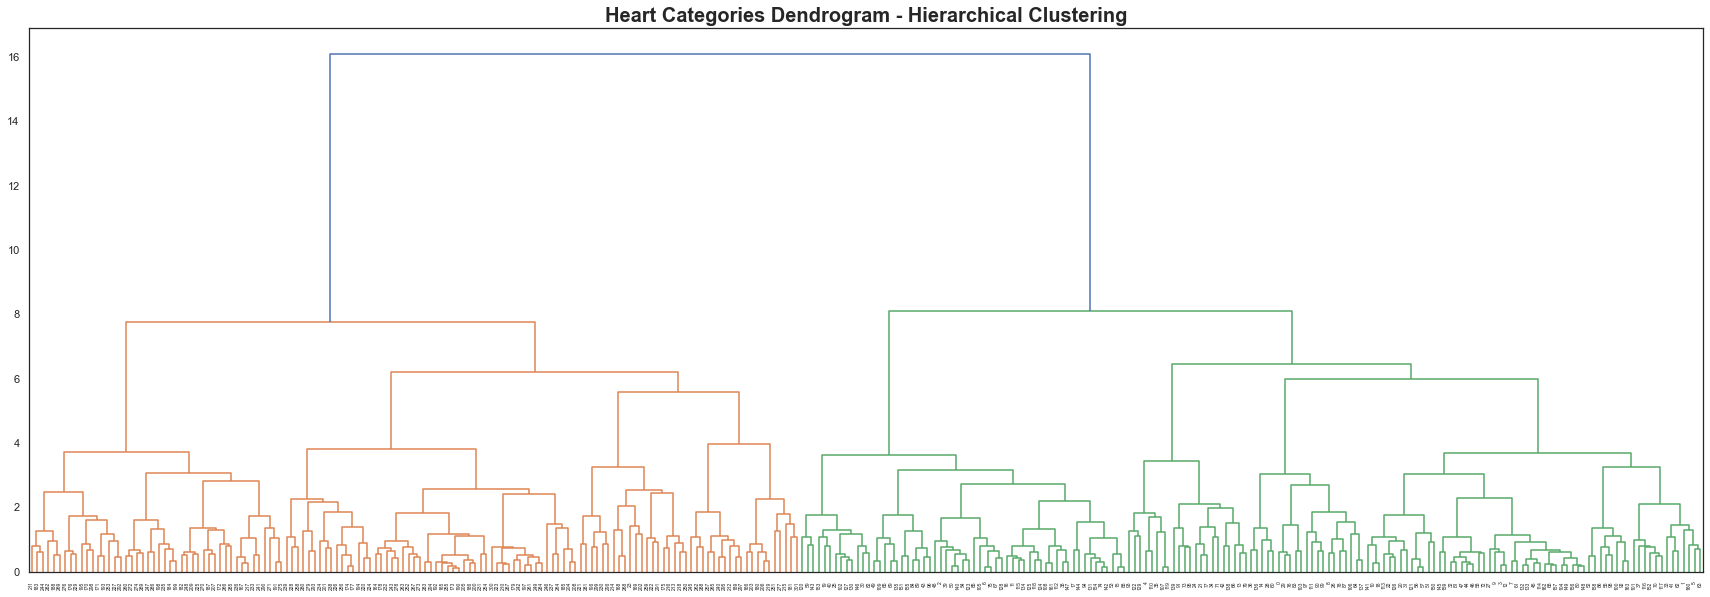

In [45]:
Z = linkage(heart1_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Heart Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [46]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

##### Evaluate with Hyperparameters

We will evaluate the clustering fit based on the scores below, by tuning hyperparameters - number of clusters and Linkage.

###### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

(Reference : https://scikit-learn.org/)

* **The Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance    (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between     a sample and the nearest cluster that sample is not part of    
* **Calinski Harabasz Score** The score is defined as ratio between the within-cluster dispersion and the between-cluster            dispersion  
* **Davies Bouldin Score** The score is defined as the average similarity measure of each cluster with its most similar             cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are       farther apart and less dispersed will result in a better score.    
* **Cophenetic Correlation Coefficient:** If the cluster is good then the linking of objects in the cluster tree should have a     strong correlation with the distances between objects in the distance vector.

In [47]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. 

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [48]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(heart1_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,2,average,0.248721,108.309601,1.628693,110.187015,0.781511
1,2,complete,0.248487,108.029051,1.628116,109.905654,0.748737
2,2,ward,0.247382,107.501427,1.635290,109.384098,0.694246
3,3,ward,0.182165,73.946153,1.825142,75.953460,0.694246
4,3,complete,0.210405,65.196151,1.865683,67.272238,0.748737
5,3,average,0.206750,64.635706,1.883283,66.725739,0.781511
6,4,ward,0.169690,64.190661,1.926650,66.287001,0.694246
7,5,ward,0.186976,57.133244,1.807803,59.128023,0.694246
8,4,complete,0.134887,48.204487,2.222884,50.562258,0.748737
9,5,complete,0.153978,48.227381,1.987498,50.368857,0.748737


**Observations:**  
* We find the top record with average linkage with 2 clusters (silhoutte = 0.24).    


###### Agglomerative: Three Clusters

In [49]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='average',compute_distances=True)
labels_=cluster.fit_predict(heart1_transformed)

In [50]:
# Data points spread
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 138],
       [  1, 164]], dtype=int64)

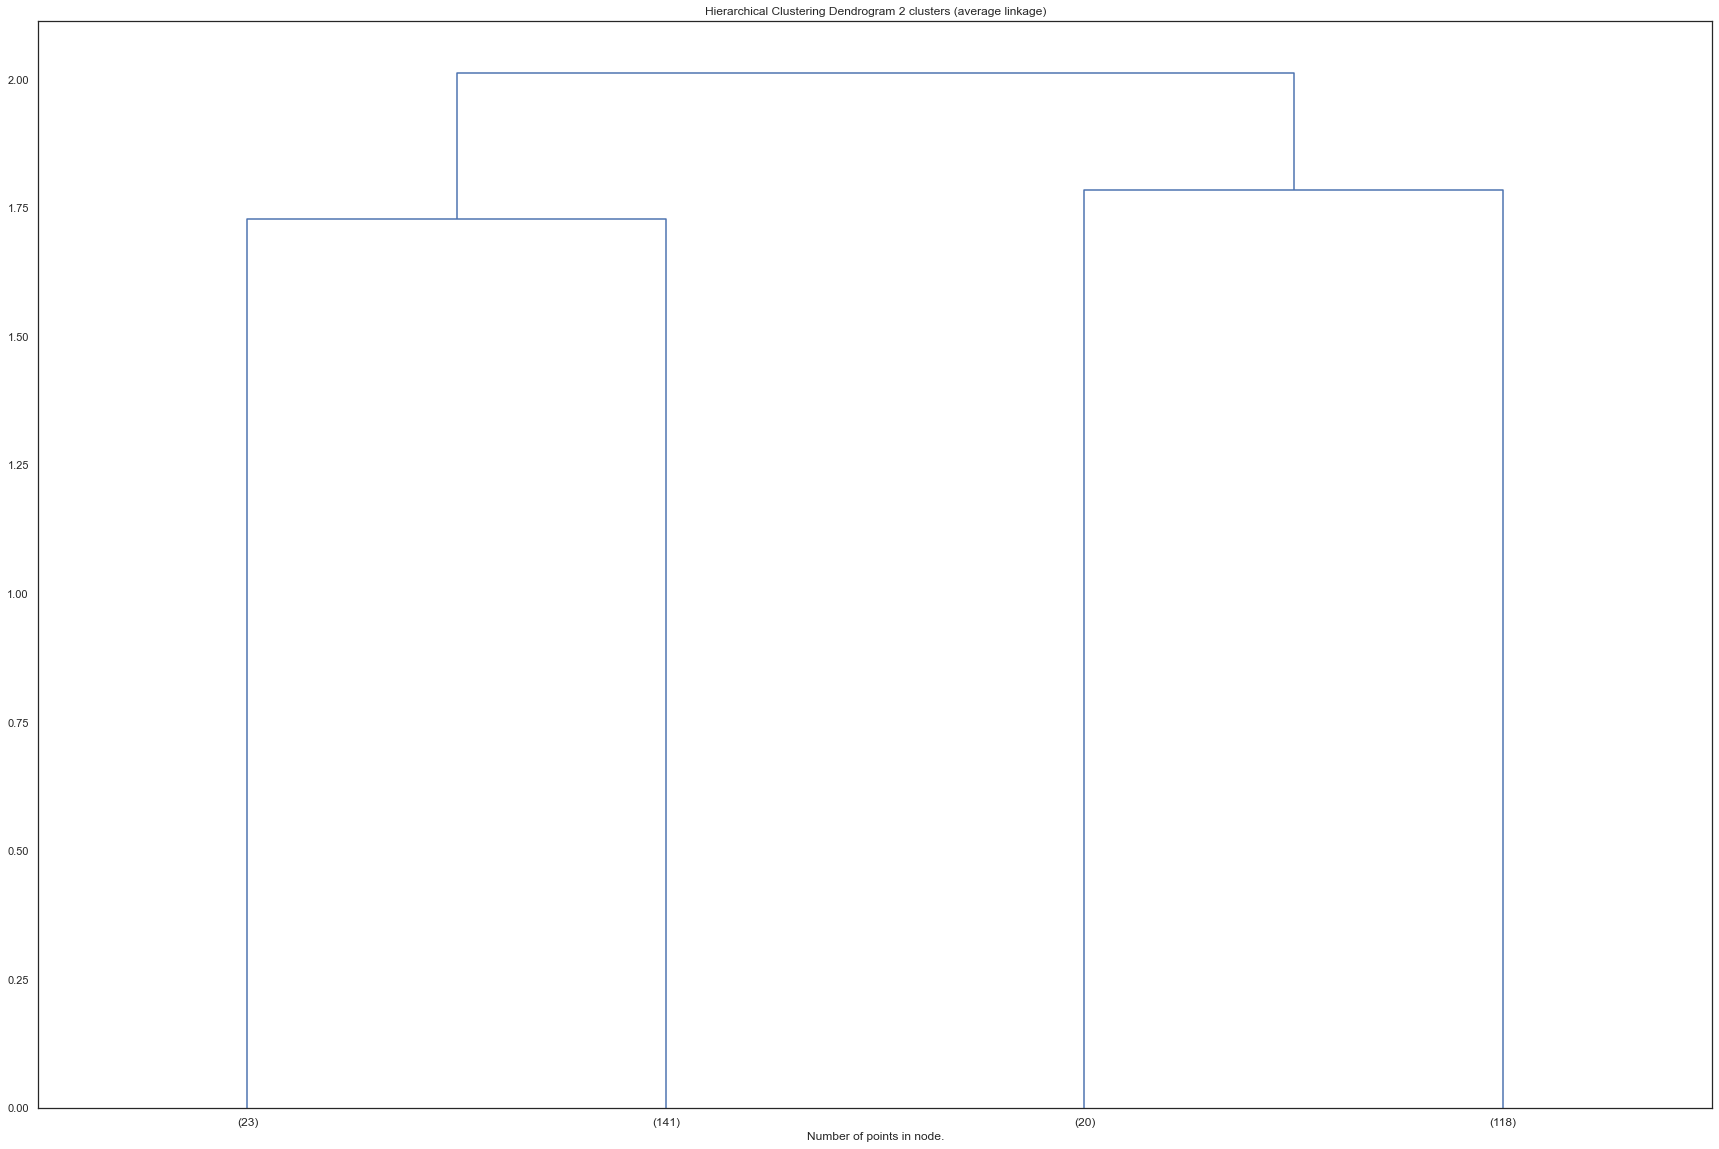

In [52]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 2 clusters (average linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

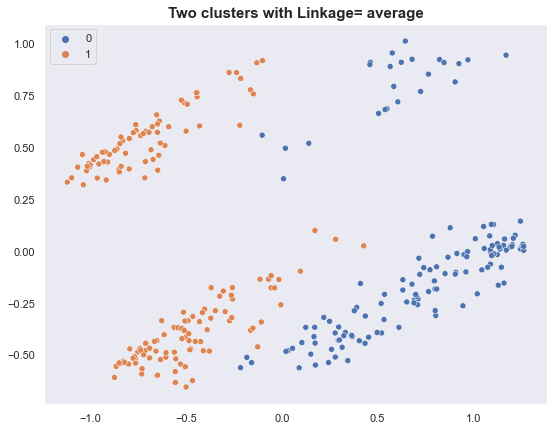

In [53]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
heart_pca = pca.fit_transform(heart1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=heart_pca[:,0], y=heart_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= average",fontsize=15,fontweight="bold")
plt.show()

#### K Means Clustering

##### Evaluate k with Elbow Graph

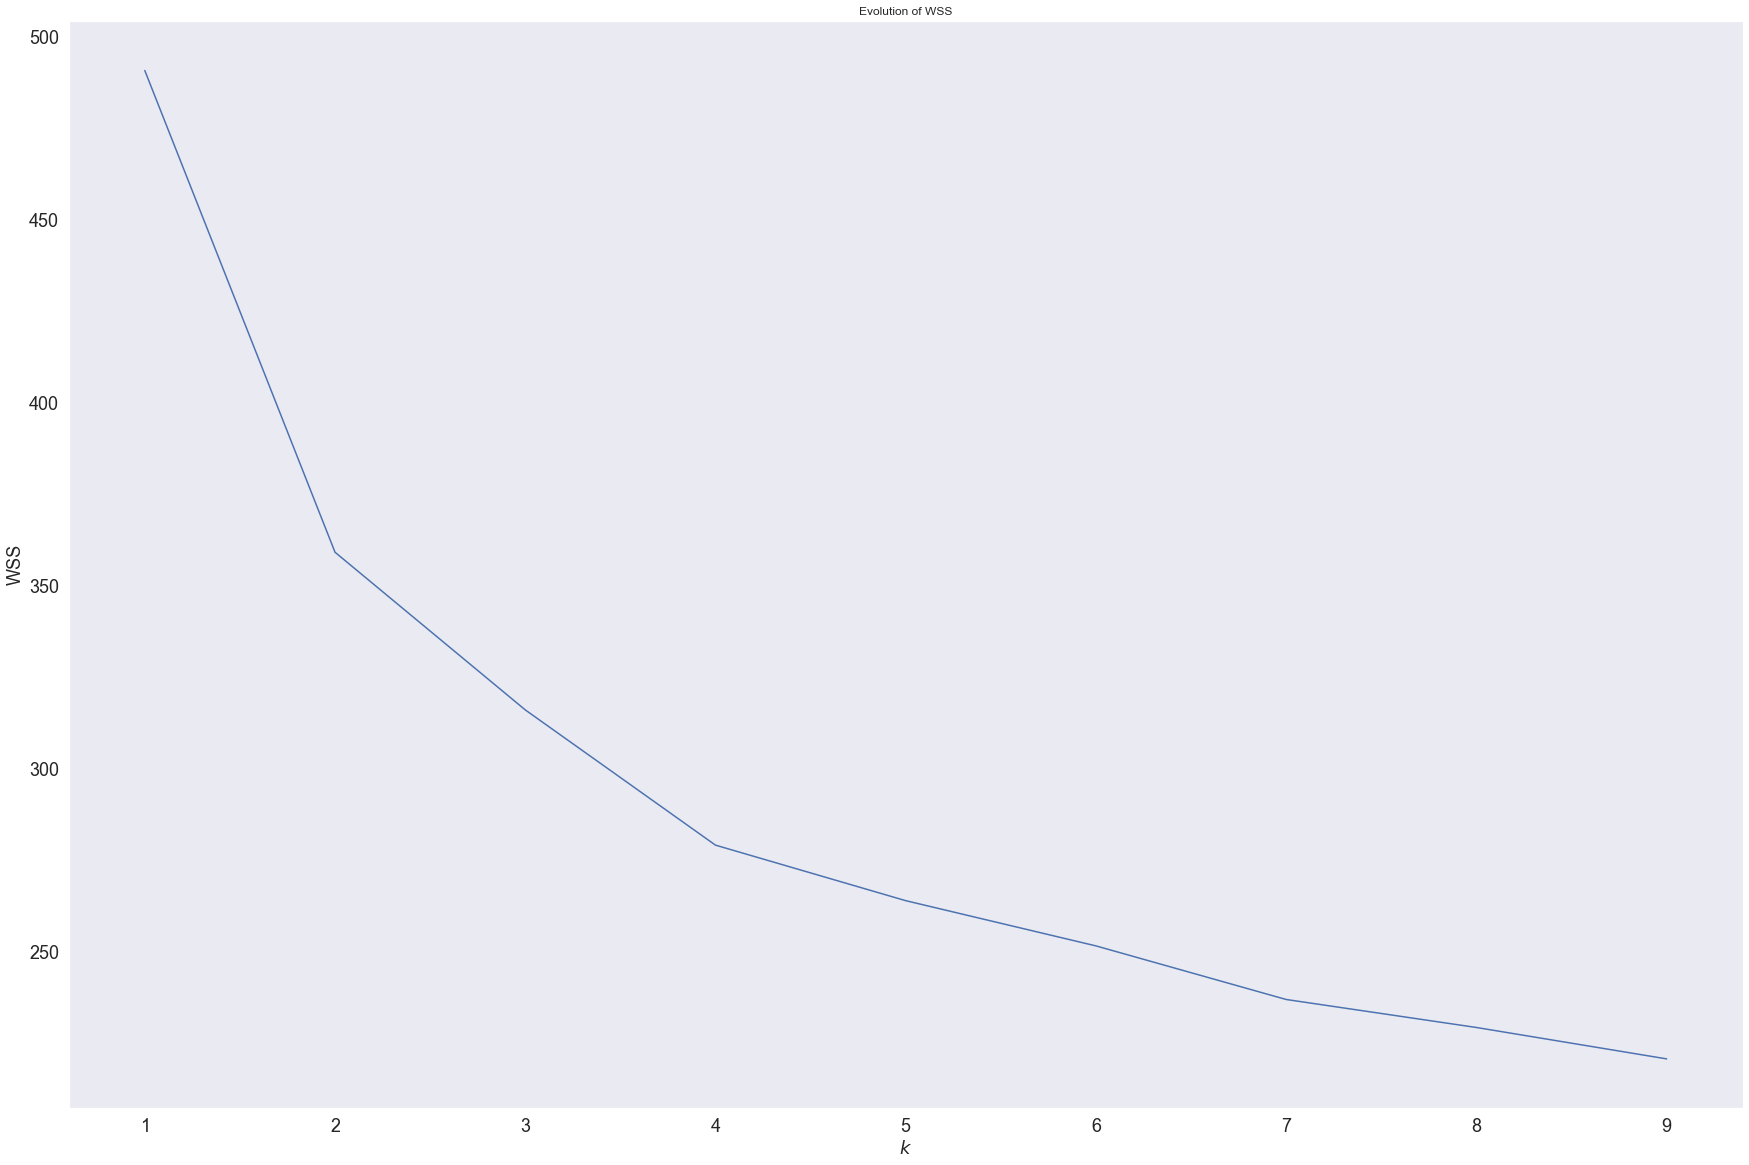

In [54]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(heart1_transformed)
    y_kmeans = kmeans.predict(heart1_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS",fontsize=18)
plt.xlabel("$k$",fontsize=18)
plt.xticks(k,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

based on elbow graph the optima is at 4 clusters

##### Apply K Means clustering

In [55]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=4, random_state=2)
kmeans.fit(heart1_transformed)
labels_ = kmeans.predict(heart1_transformed)

In [56]:
# Data points spread
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 3, 3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3,
       1, 3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3,

In [57]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 89],
       [ 1, 61],
       [ 2, 73],
       [ 3, 79]], dtype=int64)

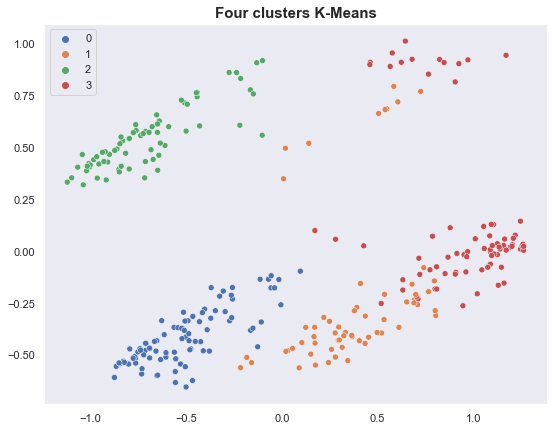

In [59]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
heart_pca = pca.fit_transform(heart1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=heart_pca[:,0], y=heart_pca[:,1],palette="deep")
plt.title("Four clusters K-Means",fontsize=15,fontweight="bold")
plt.show()

#### PCA on original Dataset

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(heart1_transformed)

# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.32242095, 0.12951112, 0.10480725])

In [62]:
# PCA weights
pca.components_

array([[ 6.96939362e-02,  2.41763506e-01, -3.50643260e-01,
         3.15748712e-02,  1.60436876e-02,  2.84915437e-02,
        -8.34514910e-02, -1.37819796e-01,  4.52440797e-01,
         2.28011733e-01, -2.19269716e-01,  2.98862121e-01,
         1.46570522e-01, -6.08395562e-01],
       [ 8.14723758e-02, -9.09043685e-01, -2.16676194e-01,
         3.14188464e-02,  6.19467502e-02, -8.04414656e-02,
        -2.26323848e-04, -9.11161988e-02,  2.35993100e-01,
         9.63153904e-02, -1.66842712e-01, -2.02782125e-02,
        -7.69076669e-02,  3.63839012e-02],
       [ 1.74741842e-01, -2.07205486e-01,  2.47858086e-01,
         8.72110414e-02,  3.88296217e-02,  3.58744418e-01,
        -1.55803045e-01, -2.09328468e-02, -5.45348595e-01,
         1.00669174e-01, -6.47523399e-02,  5.86747509e-01,
        -1.06445599e-02, -2.15535438e-01]])

In [63]:
# PCA shape
pca_values.shape

(302, 3)

In [65]:
heart1.shape

(302, 14)

In [66]:
# PCA scores
pca_values

array([[-0.43141283, -0.33944119,  0.45057732],
       [-0.46600562, -0.31388205, -0.15159192],
       [-0.81767037,  0.4721691 ,  0.00609923],
       [-0.65465675, -0.43060091, -0.27063959],
       [-0.23780759,  0.8607111 , -0.73746714],
       [-0.37033884, -0.17531601, -0.36118253],
       [-0.64112274,  0.62735244,  0.11678143],
       [-0.69198311, -0.51395031, -0.35510136],
       [-0.65441465, -0.59934159,  0.16292967],
       [-0.69111848, -0.46956783, -0.16210451],
       [-0.40440265, -0.27865467, -0.38306958],
       [-1.00959969,  0.42275178, -0.03124797],
       [-0.66660448, -0.43446342, -0.28909972],
       [-0.070395  , -0.13477427, -0.52245737],
       [-0.91906992,  0.3434144 ,  0.55139146],
       [-0.79952743,  0.54153547,  0.04179238],
       [-1.06812214,  0.40500739, -0.01894939],
       [-0.65522509,  0.65701105,  0.22019015],
       [-0.41613996, -0.29586125, -0.40902921],
       [-0.67368813,  0.44234774,  0.65679803],
       [-0.25875592, -0.23032048, -0.358

##### Agglomerative Clustering on PCA data

In [67]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(pca_values)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,2,average,0.411113,253.646962,1.030254,255.088329,0.786596
1,2,ward,0.396125,227.157479,1.071805,228.625409,0.751635
2,5,ward,0.425158,219.875268,0.885848,221.186275,0.751635
3,3,ward,0.407907,219.774675,0.914118,221.096700,0.751635
4,2,complete,0.390688,217.894882,1.042991,219.328560,0.734192
5,4,ward,0.425170,208.899201,1.021818,210.346188,0.751635
6,4,average,0.415136,205.620157,0.958018,206.993312,0.786596
7,5,average,0.398718,168.031829,0.782057,169.212603,0.786596
8,3,average,0.376409,166.887620,1.036913,168.300942,0.786596
9,3,complete,0.275387,162.174400,1.496785,163.946572,0.734192


**Observations:**  
* We find the top record with average linkage with 2 clusters has silhoutte = 0.41 compared to silhoutte = 0.24 without PCA.
* 2 clusters with average linkage is the winner with and without PCA.

In [68]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='average',compute_distances=True)
labels_=cluster.fit_predict(pca_values)

In [69]:
# Data points spread
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 138],
       [  1, 164]], dtype=int64)

 We observe no variation in the distribution across clusters with and wiithout PCA

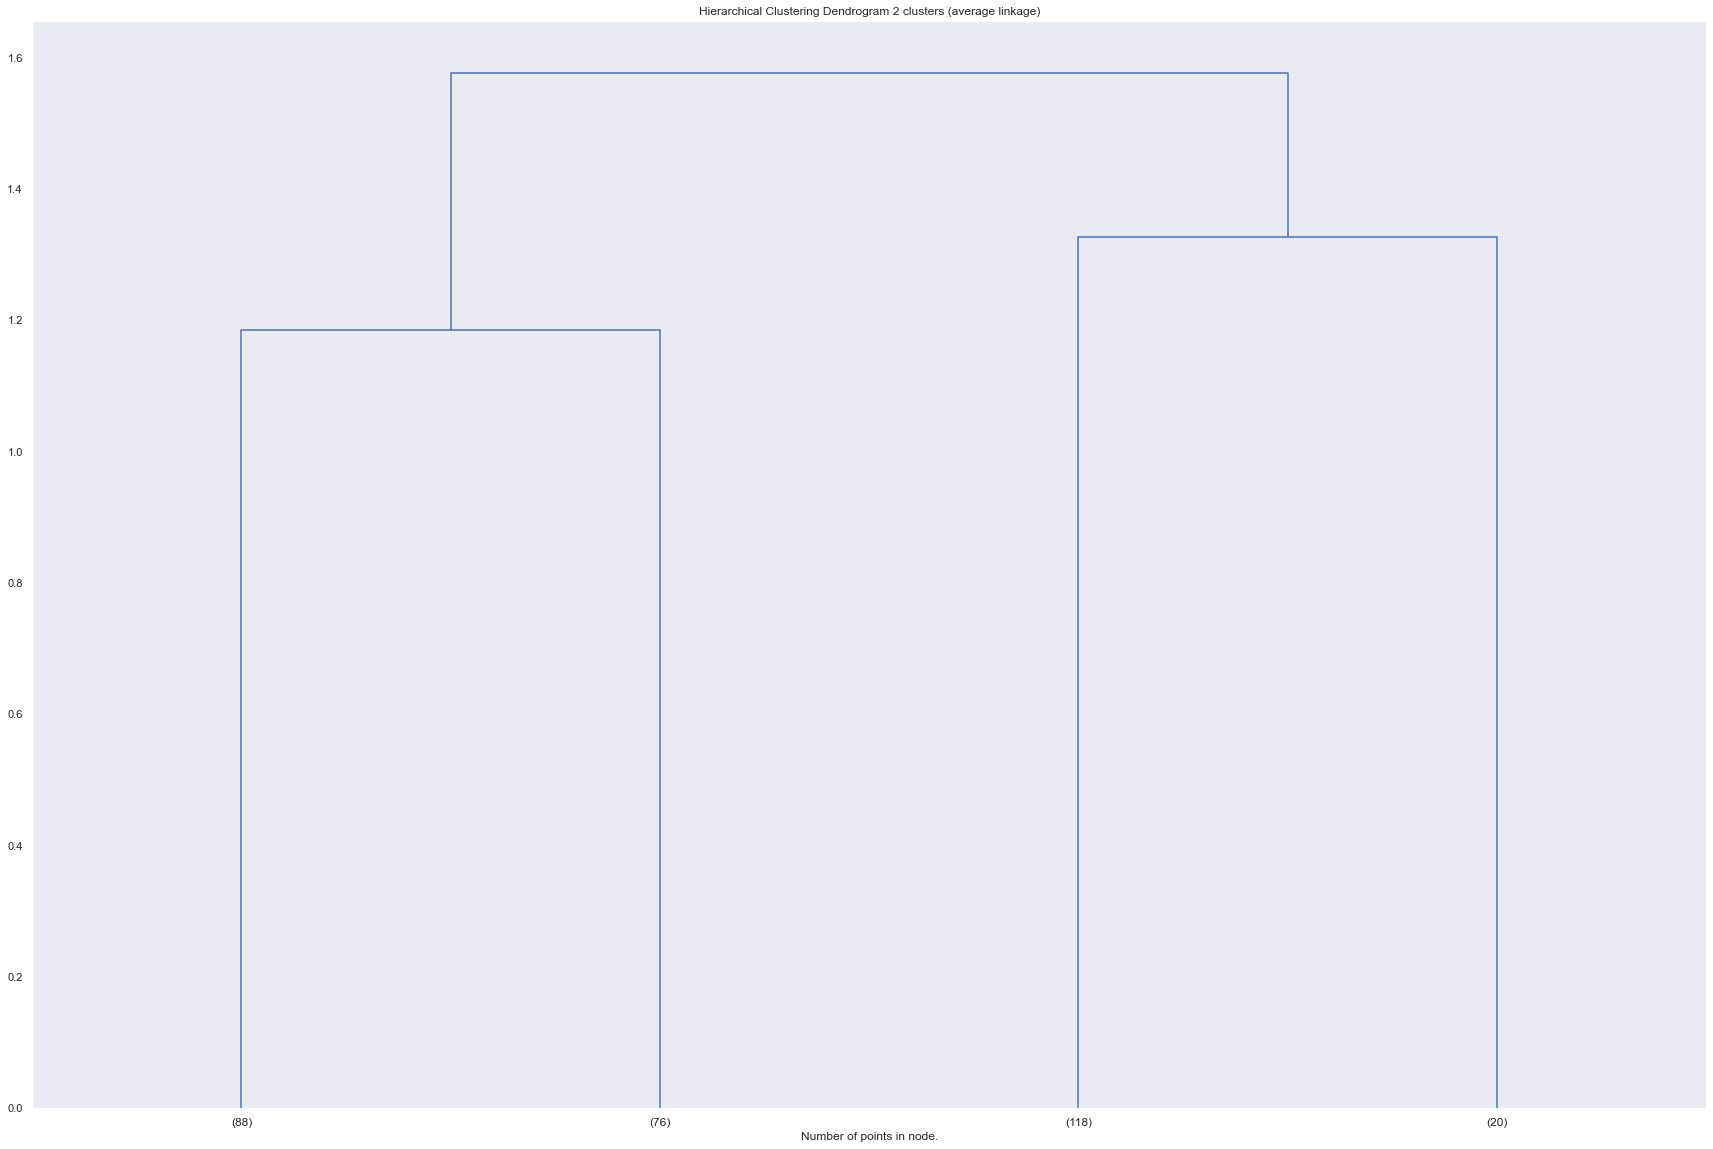

In [71]:
plt.title("Hierarchical Clustering Dendrogram 2 clusters (average linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

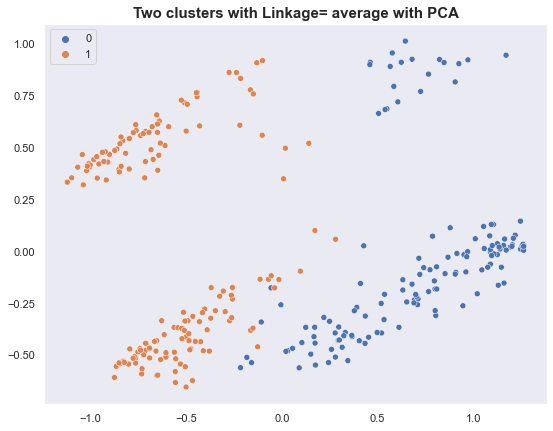

In [72]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=pca_values[:,0], y=pca_values[:,1],palette="deep")
plt.title("Two clusters with Linkage= average with PCA",fontsize=15,fontweight="bold")
plt.show()

##### K Means Clustering on PCA data

In [75]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=4, random_state=2)
kmeans.fit(pca_values)
labels_ = kmeans.predict(pca_values)

In [76]:
# Data points spread
kmeans.labels_

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 3, 1, 1, 2, 1, 1, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0,
       1, 0, 0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 1, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 0, 0, 3, 1, 0, 0, 3,
       3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0,

In [77]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 77],
       [ 1, 91],
       [ 2, 73],
       [ 3, 61]], dtype=int64)

 [ 0, 89],[ 1, 61], [ 2, 73],[ 3, 79] without PCA

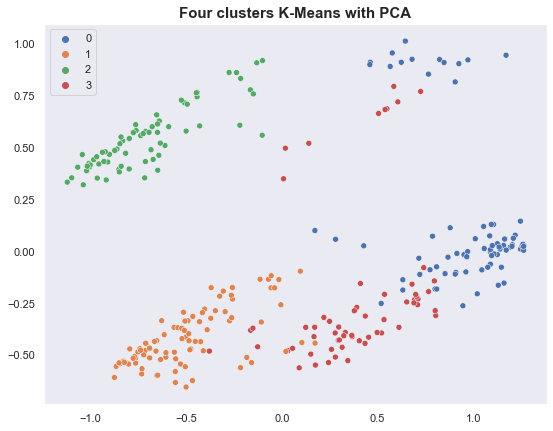

In [78]:
# Transform data to visualize data in 2d
sns.set_style('dark')
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=pca_values[:,0], y=pca_values[:,1],palette="deep")
plt.title("Four clusters K-Means with PCA",fontsize=15,fontweight="bold")
plt.show()

**Conclusion**:   
* We did not observe any significant change in the clusters after PCA. The computational cost reduced as we reduced    
* 14 columns to 3 columns without significant data loss (54% explained variance)   

In [79]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.32242095, 0.12951112, 0.10480725])